#¿Cómo dibujar mapas estáticos con Python?
Ya que gran parte de la información del INE hace referencia a territorios geográficos (España, CCAA, provincias o municipios), emplear mapas es una manera idónea de mostrar los datos. Así, en este cuaderno, explicamos cómo realizar mapas estáticos en Python.

A diferencia de los mapas interactivos - que en otros cuadernos se explica cómo crearlos -, los mapas estáticos no muestran información adicional al pasar el cursor por encima de ellos. Sin embargo, resultan muy útiles a la hora de realizar presentaciones en Power Point o plataformas similares, ya que nos los podremos descargar en formato *.png* o *.jpg* e insertarlos fácilmente como imágenes.

Los principales apartados de este cuaderno son:
1. **Cómo cargar la información necesaria para hacer mapas.**
2. **Cómo crear un mapa estático básico, pero completo.**
3. **Cómo acercar las islas Canarias a la península Ibérica.**
4. **Cómo dibujar un mapa al lado de otro.**
5. **Cómo dotar de interactividad a un mapa, en principio, estático.**

###Librerías básicas a utilizar

*Geopandas* es la librería de Python que nos permite realizar mapas estáticos.

Su uso no es complicado, ya que maneja los *dataframes* al igual que hace *Pandas*.

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

###Cargamos la información geográfica
Una de las formas más habituales de utilizar información geográfica es mediante archivos *shapefile* (*.shp*). Este tipo de archivos es el formato estrella en Sistemas de Información Geográfica (SIG) como ArcGIS o QGIS.

Podemos leer este tipo de archivos con *Geopandas*, de la siguiente forma:
```python
mapa = gpd.read_file("mapa_provincias.shp")
```

Sin embargo, si leemos solamente un archivo *.shp* se producirá el siguiente error:

```python
CPLE_OpenFailedError: Unable to open mapa_provincias.shx or mapa_provincias.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.
```
Dicho error se debe a que al llamar a un archivo *.shp*, en realidad, Python no solo está llamando a dicho archivo, sino a todos los archivos que estaban dentro de la misma carpeta *.zip* que descargamos (archivos *.shx*, *.dbf*, *.sbn*, etc). Entonces, para evitar este error, debemos tener todos esos archivos cargados en *Colab*, pese a solo llamar directamente al archivo *.shp*. Existen dos formas de tener todos los archivos cargados en *Colab*:
* **Forma 1**: Subir los archivos directamente a *Colab*. Se deben seguir los siguientes pasos:
  1. Clicamos en el icono de la derecha de la pantalla que tiene forma de carpeta y se abre un desplegable a su derecha.
  2. Clicamos en el icono que nos muestra una carpeta con una flecha hacia arriba en su interior.
  3. Se abrirá una carpeta para que busquemos el archivo. Una vez seleccionado, le damos a "Abrir". (Como podemos seleccionar varios archivos a la vez, se recomienda seleccionar todos los que estaban dentro de la carpeta *.zip*, y luego darle a "Abrir").
  4. Esperamos a que se cargue y, una vez cargado, ya podemos usar la función de Python apropiada para leer dicho archivo.

  (Esta operación de carga hay que realizarla cada vez que se abra el cuaderno).
* **Forma 2**: conectar *Colab* con nuestra cuenta de *Google Drive*, y extraer la información directamente desde dicha cuenta. Se deben seguir los siguientes pasos:
  1. Tener una cuenta en *Google Drive*.
  2. Subir la carpeta descomprimida con los archivos del mapa (*.shp* y demás) a la cuenta de *Drive*.
  3. Ejecutar las siguientes líneas de código (también podemos dar al icono de la carpeta con el símbolo de *Drive* en su interior, que se encuentra a la derecha del icono que nos muestra una carpeta con una flecha hacia arriba en su interior - ver **Forma 1**).
  ```python
  from google.colab import drive
  drive.mount("/content/gdrive")
  ```
  4. Al ejecutar las líneas anteriores, tendremos que dar permisos a *Colab* para que conecte con nuestra cuenta de *Drive*. Dichos permisos deberán darse cada vez que abramos el cuaderno y ejecutemos esta función, es decir, no son permisos que duren para siempre.
  5. Hecho lo anterior, todos los archivos que tuviésemos en *Drive* estarán disponibles en *Colab*. Al clicar en el icono de la derecha de la pantallla que tiene forma de carpeta, nos aparecerá una carpeta llamada *gdrive* que contiene todas las carpetas o archivos que tuviésemos en *Drive*.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Una vez cargados todos los archivos necesarios en *Colab*, ya se podrá utilizar la función de lectura de *Geopandas* sin problema. Para ello, debemos seguir los siguientes pasos:
* Si se ha utilizado la **Forma 1** para subir los archivos, simplemente debemos poner entre comillas el nombre del archivo. Por ejemplo:
```python
mapa = gpd.read_file("mapa_provincias.shp")
```
* Si se ha utilizado la **Forma 2**, el procedimiento es un poco más largo:
  1. Buscamos el archivo *.shp* cargado en *Colab*.
  2. Una vez localizado en su correspondiente carpeta, le damos a los tres puntitos que nos aparecen al poner el cursor encima del archivo.
  3. Seleccionamos la opción "Copiar ruta".
  4. Copiamos dicha ruta dentro de la función de *Geopandas*.
  
  Por ejemplo:
  ```python
  mapa = gpd.read_file("/content/gdrive/MyDrive/Mapa/mapa_provincias.shp")
  ```

Como en este cuaderno nos hemos conectado a *Drive*, debemos seguir los pasos de la segunda opción. 


Las capas *shapefile* que vamos a utilizar las vamos a descargar de la página web del [Instituto Geográfico Nacional](http://centrodedescargas.cnig.es/CentroDescargas/buscar.do?filtro.codFamilia=LILIM&filtro.codCA=11#).

Nos descargaremos una carpeta *.zip* que, a su vez, contendrá otras carpetas con la información de los límites geográficos de la España peninsular, Islas Baleares, Ceuta y Melilla (carpeta *SHP_ETRS89*), y de las Islas Canarias (carpeta *SHP_WGS84*). Asimismo, dentro de cada una de esas dos carpetas, tendremos otras con los recintos autonómicos, provinciales y municipales. Utilizaremos las capas de provincias para nuestro ejemplo.

Como el archivo *.shp* para las Islas Canarias es distinto al del resto de España, debemos leer ambos archivos por separado, para, posteriormente, concatenarlos (es decir, juntar ambas tablas una debajo de la otra):


In [ ]:
Canarias = gpd.read_file("/content/gdrive/MyDrive/recintos_provinciales_inspire_canarias_wgs84/recintos_provinciales_inspire_canarias_wgs84.shp")
Canarias

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34053800000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34053800000,Santa Cruz de Tenerife,ES7,ES70,None,"MULTIPOLYGON (((-17.96450 27.68740, -17.96445 ..."
1,ES.IGN.BDDAE.34053500000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34053500000,Las Palmas,ES7,ES70,None,"MULTIPOLYGON (((-15.69643 27.77113, -15.69653 ..."


In [ ]:
Resto_Espanna = gpd.read_file("/content/gdrive/MyDrive/recintos_provinciales_inspire_peninbal_etrs89/recintos_provinciales_inspire_peninbal_etrs89.shp")
Resto_Espanna.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34104600000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34104600000,València/Valencia,ES5,ES52,None,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40..."
1,ES.IGN.BDDAE.34084500000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34084500000,Toledo,ES4,ES42,None,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
2,ES.IGN.BDDAE.34024400000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34024400000,Teruel,ES2,ES24,None,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
3,ES.IGN.BDDAE.34094300000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34094300000,Tarragona,ES5,ES51,None,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
4,ES.IGN.BDDAE.34074200000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34074200000,Soria,ES4,ES41,None,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."


Vemos que el *dataframe* (su formato, visualización) es idéntico a cualquier otro de *Pandas*, salvo por una excepción: la columna *geometry*. En esta columna tenemos las coordenadas geográficas que nos permiten dibujar el mapa.

Antes de dibujar el mapa, debemos unir ambos *dataframes*, concatenando uno debajo del otro:

In [ ]:
mapa = gpd.GeoDataFrame(pd.concat([Resto_Espanna, Canarias]))

Finalmente, añadimos una columna llamada *Codigo* extrayendo los dígitos quinto y sexto de la variable *NATCODE*. Esta nueva columna nos será útil más adelante.

In [ ]:
mapa["Codigo"] = mapa["NATCODE"].str[4:6]
#Comprobamos que la nueva columna se ha creado correctamente:
mapa[["NAMEUNIT", "NATCODE", "Codigo"]].head()

,NAMEUNIT,NATCODE,Codigo
0,València/Valencia,34104600000,46
1,Toledo,34084500000,45
2,Teruel,34024400000,44
3,Tarragona,34094300000,43
4,Soria,34074200000,42


###Dibujamos el mapa
Hecho lo anterior, ya podemos representar el mapa. Eso sí, todavía será un mapa sin ningún tipo de información:

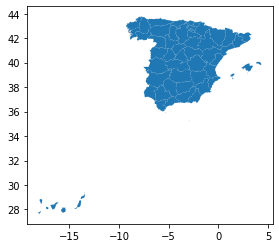

In [ ]:
mapa.plot();

### Mejoramos el mapa y mostramos información estadística: mapa estático de cloropletas
Como ejemplo, vamos a mostrar la tasa de paro provincias.

Para ello, primero debemos cargar el archivo con esa información. La tasa de paro por provincias la hemos obtenido de la siguiente [pestaña del INE](https://www.ine.es/jaxiT3/Datos.htm?t=3996) (la información se refiere al primer trimestre de 2021) [Es posible que al entrar en el enlace no salga directamente la tabla con dicha tasa de paro, pero podemos buscarla fácilmente clicando en *Resultados provinciales* > *Población en viviendas familiares (incluye parados)* > *Población de 16 y más años por relación con la actividad económica, sexo y provincia*. Llegamos así a una página que nos permitirá construir nuestra tabla para descargar.]

Nos descargamos la información en un *.csv* separado por punto y coma. Lo cargamos en *Colab*, por ejemplo, haciendo uso de la **Forma 1**, y leemos el archivo (antes de subirlo le hemos cambiado el nombre a *Tasa_Paro_Provincias* para facilitar seguir el cuaderno):

In [ ]:
datos_parados = pd.read_csv("Tasa_Paro_Provincias.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
#Las opciones engine = "python" y encoding = "latin-1" las utilizamos para evitar un problema relacionado con la codificación UTF-8
datos_parados = datos_parados.rename(columns={"Total": "Tasa_Paro"}) # Cambiamos el nombre de la columna "Total" a "Tasa_Paro"
datos_parados.head()

,Sexo,Provincias,Tasas,Periodo,Tasa_Paro
0,Ambos sexos,02 Albacete,Tasa de paro de la población,2021T1,19.77
1,Ambos sexos,03 Alicante/Alacant,Tasa de paro de la población,2021T1,19.17
2,Ambos sexos,04 Almería,Tasa de paro de la población,2021T1,17.14
3,Ambos sexos,01 Araba/Álava,Tasa de paro de la población,2021T1,11.31
4,Ambos sexos,33 Asturias,Tasa de paro de la población,2021T1,14.09


Extraemos en un nueva columna llamada *Codigo* el código de provincia de la columna *Provincias*, y solo nos quedaremos con dicha columna *Codigo* y la columna de la tasa de paro:

In [ ]:
datos_parados["Codigo"] = datos_parados["Provincias"].str[:2]
datos_parados = datos_parados[["Codigo", "Provincias", "Tasa_Paro"]]

Hacemos la unión de tablas con el *dataframe* de la capa geográfica. Las tablas se fusionarán en base a la variable *Codigo*.

In [ ]:
mapa1 = pd.merge(mapa, datos_parados)
mapa1 = mapa1[["NAMEUNIT", "Codigo", "Tasa_Paro", "geometry"]] #Nos quedamos con las columnas más relevantes
mapa1 = mapa1.rename(columns={"NAMEUNIT":"Provincia"}) #Renombramos la variable NAMEUNIT con el nombre "Provincia"
mapa1.head()

,Provincia,Codigo,Tasa_Paro,geometry
0,València/Valencia,46,14.75,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40..."
1,Toledo,45,16.77,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
2,Teruel,44,10.60,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
3,Tarragona,43,15.51,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
4,Soria,42,9.73,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."


Volvemos a dibujar el mapa, pero ahora indicando, mediante una escala de colores (mapa de cloropletas), la tasa de paro de cada provincia.

Las últimas tres líneas de código nos permitirán descargarnos el mapa creado en formato *.png*.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

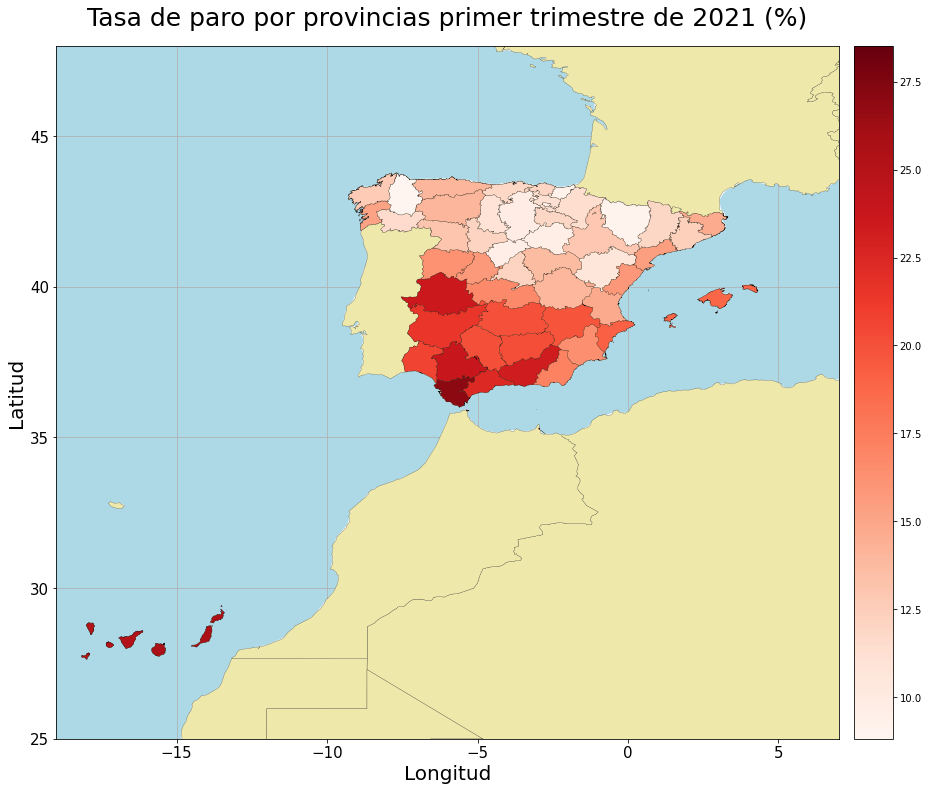

In [ ]:
#Creamos la figura y establecemos su tamaño:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
#Establecemos las coordenadas geográficas que queremos representar (es decir, de qué coordenada a qué coordenada queremos mostrar). Primero ponemos las coordenadas de longitud y luego de latitud.
ax.axis([-19, 7, 25, 48]) 
 
#Título y ejes:
ax.set_title("Tasa de paro por provincias primer trimestre de 2021 (%)", 
             pad = 20, #Eleva el título, separándolo del contorno de la figura
             fontdict={"fontsize":25}) 
ax.set_xlabel("Longitud", fontsize=20)
plt.xticks(fontsize=15)
ax.set_ylabel("Latitud", fontsize=20)
plt.yticks(fontsize=15)
plt.grid(True, zorder=0)

#Añadimos la leyenda separada del mapa:
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",
                         size="5%",
                         pad=0.2) #Para separar la leyenda un poco del mapa

#Dibujamos nuestro mapa de provincias:
mapa1.plot(ax=ax,
           column="Tasa_Paro",
           cmap="Reds",
           edgecolor="black",
           linewidth=0.2,
           legend=True,
           cax=cax,
           zorder=5); #Cuanto menor sea este número, más abajo estará la capa. Fijando este número en 5, y las otras dos capas en núumeros menores, nos aseguramos de que este capa se vea por encima de las otras.

#Cargamos dos capas (uno de mares y oceanos, y otro de los países del mundo) para complementar nuestro mapa:
#La capa de océanos la hemos obtenido del siguiente enlace: https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/
mapa_oceanos = gpd.read_file("/content/gdrive/MyDrive/Océanos/ne_50m_ocean.shp")
mapa_oceanos.plot(ax=ax,
                 color="lightblue",
                 zorder=0);
#La capa de países la hemos obtenido del siguiente enlace: https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about 
mapa_paises = gpd.read_file("/content/gdrive/MyDrive/Mapamundi/Mapa_paises_mundo.shp")
mapa_paises.plot(ax=ax,
                 color="palegoldenrod",
                 edgecolor="black",
                 linewidth=0.2,
                 zorder=2);

#Nos descargamos el mapa en formato .png:
plt.savefig("Mapa_Tasa_Paro_Provincias_Geopandas.png")
from google.colab import files
files.download("Mapa_Tasa_Paro_Provincias_Geopandas.png")     

###Truco: ¿Cómo acercar las Canarias a la península?


Debido a la gran distancia entre las islas Canarias y el resto de España, es habitual ver mapas donde las Canarias han sido "subidas". Por lo que, si es quieres crear un mapa de este estilo, a continuación, te mostramos cómo hacerlo.


La clave está en la función *affinity.translate()* del paquete *shapely*.

Con esta función, podemos moficar la geometría de las islas, acercáncolas a la península.

Para ello, vamos a crear un nuevo *dataframe* de las Canarias, que será el que modifiquemos:

In [ ]:
Canarias_Acercadas = Canarias
from shapely import affinity
Canarias_Acercadas["geometry"] = Canarias_Acercadas["geometry"].apply(affinity.translate, xoff=4.5, yoff=7) #Con la función apply() aplicamos la función affinity.translate a la columna "geometry"

Posteriormente, unimos el nuevo *dataframe* de las Canarias, con el que contiene la información del resto de provincias. Y, también, al igual que antes, creamos una nueva columna de códigos de provincia para hacer la unión con los datos de tasa de paro.

In [ ]:
mapa_truco = gpd.GeoDataFrame(pd.concat([Resto_Espanna, Canarias_Acercadas]))
mapa_truco["Codigo"] = mapa_truco["NATCODE"].str[4:6]

Realizamos la unión con el *dataframe* que contiene las tasas de paro provinciales:

In [ ]:
mapa_truco = pd.merge(mapa_truco, datos_parados)
mapa_truco = mapa_truco[["NAMEUNIT", "Codigo", "Tasa_Paro", "geometry"]] #Nos quedamos con las columnas más relevantes
mapa_truco = mapa_truco.rename(columns={"NAMEUNIT":"Provincia"})

Finalmente, representamos el mapa de manera muy similar a lo hecho anteriormente.

La principal diferencia reside en que hemos quitado los ejes y las capas de océanos y países, para que no parezca tan extraña la nueva posición de las islas.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

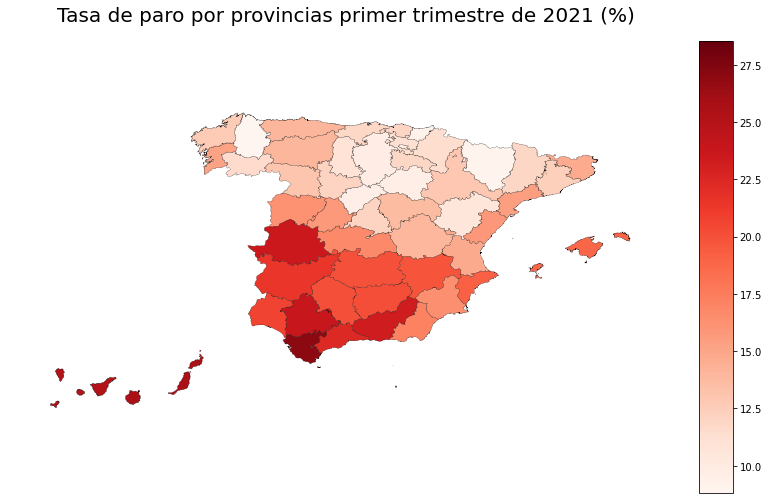

In [ ]:
#Creamos la figura y establecemos su tamaño:
fig, ax = plt.subplots(1, 1, figsize=(13, 17))
 
#Establecemos las coordenadas geográficas que queremos representar (es decir, de qué coordenada a qué coordenada queremos mostrar). Primero ponemos las coordenadas de longitud y luego de latitud.
ax.axis([-15, 6, 32, 46]) 
 
#Título y ejes:
ax.set_title("Tasa de paro por provincias primer trimestre de 2021 (%)", 
             pad = 20, #Eleva el título, separándolo del contorno de la figura
             fontdict={"fontsize":20}) 
ax.axis("off") #Para no mostrar ni los ejes ni el border. Si quisiéramos no mostrar ni los ejes ni el borde, pero sí un color de fondo, debemos poner # delante de esta línea y quitar la # de las siguientes líneas de código que si la tienen
#plt.xticks([])
#plt.yticks([])
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.set_facecolor("aliceblue")


#Añadimos la leyenda separada del mapa:
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",
                         size="5%",
                         pad=0.2) #Para separar la leyenda un poco del mapa

#Dibujamos nuestro mapa de provincias:
mapa_truco.plot(ax=ax,
                column="Tasa_Paro",
                cmap="Reds",
                edgecolor="black",
                linewidth=0.2,
                legend=True,
                cax=cax)

#Nos descargamos el mapa en formato .png:
plt.savefig("Mapa_Tasa_Paro_Provincias_Geopandas_Canarias_Acercadas.png")
from google.colab import files
files.download("Mapa_Tasa_Paro_Provincias_Geopandas_Canarias_Acercadas.png") 

###Truco: Dos mapas o más en una misma figura
A continuación mostraremos cómo dibujar un mapa al lado de otro, aunque también daremos las pistas para dibujar más de dos mapas.

Vamos a representar el mapa creado en el anterior apartado (a la izquierda) y, para mostrar otros datos diferentes a la derecha, vamos a mostrar la tasa de ocupación (que no es más que el contrario de la tasa de paro).

Los datos de la tasa de ocupación por provincias los hemos obtenido del siguiente [enlace](https://www.ine.es/jaxiT3/Datos.htm?t=9122). [De nuevo, es posible que al entrar en el enlace no salga directamente la tabla con dicha tasa de paro, pero podemos buscarla fácilmente clicando en *Resultados provinciales* > *Población en viviendas familiares (incluye parados)* > *Población de 16 y más años por relación con la actividad económica, sexo y provincia*. Llegamos así a una página que nos permitirá construir nuestra tabla para descargar.]

Leemos el archivo con los datos de ocupación:

In [ ]:
datos_ocupados = pd.read_csv("Tasa_Ocupación_Provincias.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
#Las opciones engine = "python" y encoding = "latin-1" las utilizamos para evitar un problema relacionado con la codificación UTF-8
datos_ocupados = datos_ocupados.rename(columns={"Total": "Tasa_Ocupacion"}) # Cambiamos el nombre de la columna "Total" a "Tasa_Paro"
datos_ocupados.head()

,Sexo,Provincias,Relación con la actividad económica,Periodo,Tasa_Ocupacion
0,Ambos sexos,02 Albacete,Ocupados,2021T1,80.2
1,Ambos sexos,03 Alicante/Alacant,Ocupados,2021T1,80.8
2,Ambos sexos,04 Almería,Ocupados,2021T1,82.9
3,Ambos sexos,01 Araba/Álava,Ocupados,2021T1,88.7
4,Ambos sexos,33 Asturias,Ocupados,2021T1,85.9


Creamos una columna de códigos provinciales para poder hacer uniones con otras tablas y nos quedamos con las columnas más relevantes de la tabla:

In [ ]:
datos_ocupados["Codigo"] = datos_ocupados["Provincias"].str[:2]
datos_ocupados = datos_ocupados[["Codigo", "Provincias", "Tasa_Ocupacion"]]

Realizamos la unión con el *dataframe* *mapa_truco* que ya contiene información de la tasa de paro provincial (se la hemos añadido anteriormente):

In [ ]:
mapa_truco = pd.merge(mapa_truco, datos_ocupados)
mapa_truco = mapa_truco[["Provincia", "Codigo", "Tasa_Paro", "Tasa_Ocupacion", "geometry"]] #Nos quedamos con las columnas más relevantes
mapa_truco.head()

,Provincia,Codigo,Tasa_Paro,Tasa_Ocupacion,geometry
0,València/Valencia,46,14.75,85.3,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40..."
1,Toledo,45,16.77,83.2,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
2,Teruel,44,10.60,89.4,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
3,Tarragona,43,15.51,84.5,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
4,Soria,42,9.73,90.3,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."


Creamos dos subfiguras - una al lado de la otra -, y cada una de ellas contendrá un mapa:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

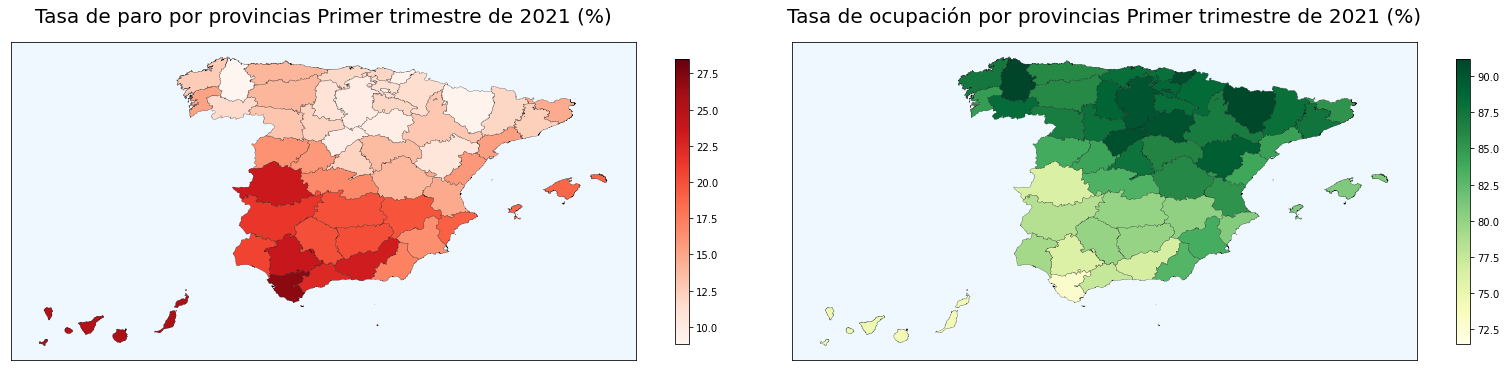

In [ ]:
#Creamos la figura, estableciendo que tendrá dos subfiguras al poner ax1 y ax2. La posición de las subfiguras la establecemos con nrows y ncols:
fig, (ax1, ax2) = plt.subplots(nrows=1, #Número de filas
                              ncols=2, #Número de columnas
                              figsize=(28, 15)) #Tamaño de la figura
#Si quisiéramos, por ejemplo, cuatro mapas, crearíamos cuatro subfiguras (ax1, ax2, ax3 y ax4), y podríamos poner que nrows fuse 2 y ncols, también.

fig.subplots_adjust(wspace=0.0) #Esta línea la utilizamos para reducir al máximo al separación entre las figuras

#Creamos la primera figura (que irá a la izquierda):
ax1.set_xticks([]) #Quitamos los ticks del eje X
ax1.set_yticks([]) #Quitamos los ticks del eje Y
ax1.set_facecolor("aliceblue") #Establecemos un color de fondo
ax1.set_title("Tasa de paro por provincias Primer trimestre de 2021 (%)", #Título del mapa
              pad = 20, #Eleva el título, separándolo del contorno de la figura)
              fontdict={"fontsize":20}) #Tamaño de la fuente del título

#Creamos el primer mapa, que irá dentro de la primera subfigura:
mapa_truco.plot(ax=ax1, #Determinamos que va dentro de la primera subfigura
                column="Tasa_Paro",
                cmap="Reds",
                edgecolor="black",
                linewidth=0.2,
                legend=True,
                #Utilizamos el siguiente método para crear la barra de color de la leyenda (el método make_axes_locatable empleado en los mapas anteriores no obtiene buenos resultados con más de una subfigura)
                legend_kwds={"orientation": "vertical", #Si queremos que la barra esté en horizontal debajo del mapa, solo debemos cambiar "vertical" por "horizontal"
                             "shrink": 0.35}) #Para reducir el tamaño por defecto de la barra (cuanto menor sea el número puesto, menor será su tamaño)

#Creamos la segunda subfigura y el segundo mapa (de manera similar a lo hecho con la primera subfigura y el primer mapa):
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_facecolor("aliceblue")
ax2.set_title("Tasa de ocupación por provincias Primer trimestre de 2021 (%)", 
             pad = 20,
             fontdict={"fontsize":20}) 

mapa_truco.plot(ax=ax2,
                column="Tasa_Ocupacion", #En este caso, representaremos la columna Tasa_Ocupacion
                cmap="YlGn", #Ponemos otro color, para que se diferencien más
                edgecolor="black",
                linewidth=0.2,
                legend=True,
                legend_kwds={"orientation": "vertical",
                             "shrink": 0.35});

#Nos descargamos la figura en formato .png:
plt.savefig("Dos_Mapas_Tasas_Paro_y_Ocupacion.png")
from google.colab import files
files.download("Dos_Mapas_Tasas_Paro_y_Ocupacion.png") 

### ¿Cómo dotar de interactividad a un mapa estático de *Geopandas*?
Al principio del cuaderno, hablamos de que *Geopandas* es una librería muy útil para, de manera sencilla, realizar mapas estáticos en Python. Asimismo, puntualizamos que la creación de mapas interactivos la explicamos en otros cuadernos. Sin embargo, vamos a acabar este cuaderno explicando como dotar de interactividad a un mapa estático de *Geopandas*. Para ello, vamos a utilizar el método *explore()* que hace uso de la librería *Folium*. No obstante, dado que en los cuadernos sobre mapas interactivos desarrollamos dicha librería de manera más amplia, os animamos a consultar también esos otros cuadernos.

En primer lugar, debemos cargar las librerías *Folium* - en su versión actualizada - y *Mapclassify*. Es importante usar la versión más actualizada de *Folium*, ya que *Geopandas* no acepta versiones de *Folium* tan antiguas como la que viene por defecto en Colab (versión 0.8.3 en marzo de 2022).

In [ ]:
!pip install folium --upgrade #Lo de upgrade lo ponemos para descargar la versión más actualizada
import folium
!pip install mapclassify
import mapclassify

A continuación, ya podemos hacer uso del método *explore()*, que nos permitirá hacer un mapa interactivo desde un mapa estático de *Geopandas* de manera sencilla.

Como hemos dicho, este método emplea la librería *Folium*, que bebe por defecto de *OpenStreetMap*. Por lo tanto, crearemos un mapa interactivo - que al pasar el cursor sobre las distintas provincias nos dé información sobre el nombre de la provincia y su tasa de paro - sobre un mapa de España y alrededores extraído de *OpenStreetMap*.

In [ ]:
mapa_interactivo = mapa1.explore(column="Tasa_Paro", #Variable sobre la que vamos a realizar la cloropleta
                                 cmap="OrRd", #Escala de colores para representar la cloropleta (hemos usado la misma escala que en los anteriores mapas estáticos)
                                 m=folium.Map(location=[40.463667, -3.74922], zoom_start=5), #Para localizar nuestro mapa en nas coordenadas concretas de latitud y longitud. El zoom permite determinar un zoom de inicio (que luego se puede modificar directamente sobre el mapa)
                                 tooltip=["Provincia", "Tasa_Paro"], #Variables que queremos mostrar, de cada provincia, al pasar el cursor por encima del mapa
                                 popup=True, #Si clicammos sobre una provincia, se nos mostrarán todos los datos que se tienen sobre dicha provincia (en nuestro caso: nombre, código y tasa de paro)
                                 vmin=0, #Valor mínimo de la leyenda (si no utilizamos esta opción, será el valor mínimo de la variable que empleemos para realizar la cloropleta)
                                 vmax=30, #Valor máximo de la leyenda (si no utilizamos esta opción, será el valor máximo de la variable que empleemos para realizar la cloropleta)
                                 style_kwds=dict(color="black"), #Para que el nombre de las columnas Provincia y Tasa_Paro aparezca en negrita en las etiquetas de cada provincia 
                                 legend_kwds=dict(caption="Tasa de paro por provincias (%). Primer trimestre de 2021."), #Título de la leyenda. Lo usamos para dar nombre al mapa
                                 tooltip_kwds=dict(aliases=["Provincia", "Tasa de paro"]) #Para cambiar el nombre de las variables que aparecerán en las etiquetas interactivas ("Provincia" lo dejamos igual, pero "Tasa_Paro" lo convertimos en "Tasa de paro")
                                 )

Nos descargarnos el mapa en un archivo HTML para poder visualizarlo en un navegador (por ejemplo, en *Google Chrome*, *Microsoft Edge* o *Mozilla Firefox*):

In [ ]:
#Nos descargamos el mapa en formato HTML
mapa_interactivo.save("Mapa_Tasa_Paro_Provincias_Geopandas_Interactivo.html")
from google.colab import files
files.download("Mapa_Tasa_Paro_Provincias_Geopandas_Interactivo.html") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>